In [1]:
!wget -nc https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/671/original/Date_Fruit_Datasets.zip

File ‘Date_Fruit_Datasets.zip’ already there; not retrieving.



In [2]:
!mkdir temp/data/
!unzip -n Date_Fruit_Datasets.zip -d temp/data/

mkdir: cannot create directory ‘temp/data/’: File exists
Archive:  Date_Fruit_Datasets.zip


In [3]:
import pandas as pd
df = pd.read_excel('temp/data/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

## D104Q1

In [4]:
corr = df.iloc[:, [1, 2, 3, 11]].corr()

comb = set()
for x in corr.columns:
    for y in corr.columns:
        if x == y:
            continue
        if ((x, y) in comb) or ((y, x) in comb):
            continue
        else:
            comb.add((x,y))

vals = {c: corr.loc[c[0], c[1]] for c in comb}

max(vals, key=lambda x: vals[x])

('PERIMETER', 'MAJOR_AXIS')

## D104Q2

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

from sklearn.metrics import classification_report

report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))
report.loc['precision'].idxmin()

'DEGLET'

## D104Q3

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

16


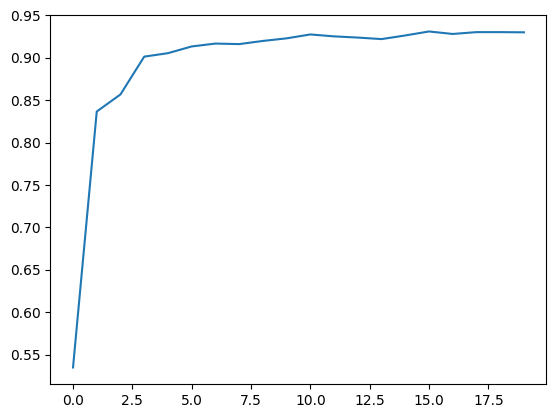

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
precision = []

from sklearn.svm import SVC  # SVC is in SVM 
from sklearn.feature_selection import RFE # RFE is in feature_selection
from sklearn.model_selection import cross_val_score
import numpy as np

for n in range(1, 21):
    
    # scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  

    # select
    ## selector object
    selector = RFE(
        estimator=SVC(kernel='linear', random_state=42),
        n_features_to_select=n
    )

    X_selected = selector.fit_transform(X=X_scaled, y=y)

    # model 
    model = SVC(kernel='linear', random_state=10)
    # evaluation
    precision.append(cross_val_score(model, X_selected, y, cv=cv, scoring='precision_weighted').mean()) 

print(np.argmax(precision)+1)

import matplotlib.pyplot as plt
plt.plot(precision)

## D104Q4

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


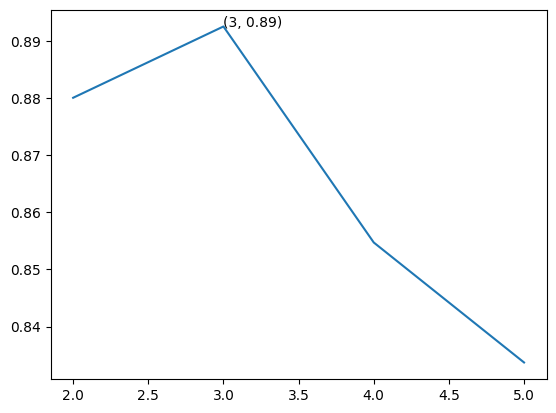

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

acc = []
pre = []
f1_ = []
d = [2, 3, 4, 5]

for degree in [2, 3, 4, 5]:
    model = SVC(kernel='poly', degree=degree, gamma='scale', random_state=10)

    accuracy = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean()  # TODO: Use the appropriate cross-validation function to get the mean accuracy
    precision = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='precision_weighted').mean()  # TODO: Provide the feature set and call the appropriate method to get the mean precision
    f1 = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1_weighted').mean()  # TODO: Specify the appropriate parameters for cross-validation

    acc.append(accuracy)
    pre.append(precision)
    f1_.append(f1)
    
plt.plot(d, pre)
xy = (d[np.argmax(pre)], float(max(pre)))
plt.annotate(text=f'({xy[0]}, {round(xy[1], 2)})', xy=xy)
plt.show()

## D104Q5

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

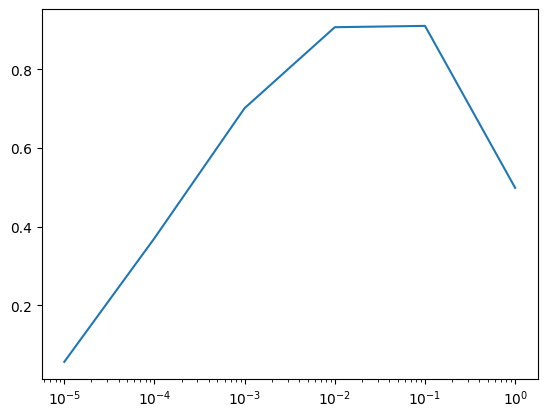

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
precision = []

from sklearn.svm import SVC  # SVC is in SVM 
from sklearn.model_selection import cross_val_score
import numpy as np

gammas = [10**(x) for x in range(-5, 1)]

for g in gammas:
    
    # model 
    model = SVC(kernel='rbf', random_state=10, gamma=g)
    # evaluation
    precision.append(cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='precision_weighted').mean()) 

import matplotlib.pyplot as plt
plt.plot(gammas, precision)
plt.xscale('log')
plt.show()

## D104Q6

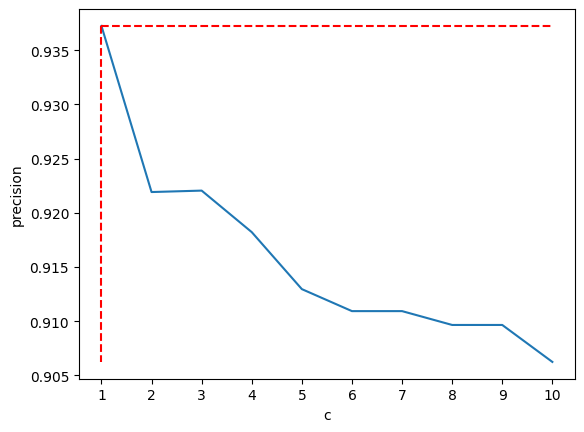

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
precision = []

from sklearn.svm import SVC  # SVC is in SVM 
from sklearn.model_selection import cross_val_score
import numpy as np

c_arr = range(1, 11)

for C in c_arr:
    
    # model 
    model = SVC(kernel='linear', random_state=10, C=C)
    # evaluation
    precision.append(cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='precision_weighted').mean()) 

import matplotlib.pyplot as plt
plt.plot(c_arr, precision)
plt.xticks(c_arr)
# plt.xscale('log')
plt.ylabel('precision')
plt.xlabel('c')
max_xy = c_arr[np.argmax(precision)], max(precision)
plt.plot(c_arr, [max_xy[1] for c in c_arr], linestyle='dashed', color='red')
plt.plot([max_xy[0] for c in c_arr], precision, linestyle='dashed', color='red')
plt.show()

## D104Q7

In [10]:
df_ = df.copy() # deep copy
df_['Class'] = df_['Class'].apply(lambda x: 1 if x == 'SAFAVI' else 0)

# X, y
X = df_.iloc[:, :-1]
y = df_.iloc[:, -1]

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# T-SNE
from sklearn.manifold import TSNE
tSNE =  TSNE(n_components=2, learning_rate='auto', random_state=42)
X_TSNE = tSNE.fit_transform(X_scaled)

# SVM
from sklearn.svm import SVC 
model = SVC(kernel='linear', C = 1)
model.fit(X_TSNE, y) 

model.support_vectors_ 

array([[-16.18364716,  19.08672523],
       [-30.75614357,   0.65138471],
       [ -0.95420724, -17.50270271],
       [ -0.41360781, -17.23448944],
       [ -1.0424695 , -16.83862877],
       [-17.47714996,  20.84731483],
       [-27.09525299,  -1.76114714],
       [-26.23534775,  -1.65126884],
       [-27.47045326,  -4.95546579],
       [-26.78086472,  -4.46428585],
       [-25.58463669,  -5.90024376],
       [ -4.71091986,   0.84839737],
       [ -5.17222404,   2.09345603],
       [-27.27578163,  -4.46542931],
       [ -3.37542343,   3.88015151]])

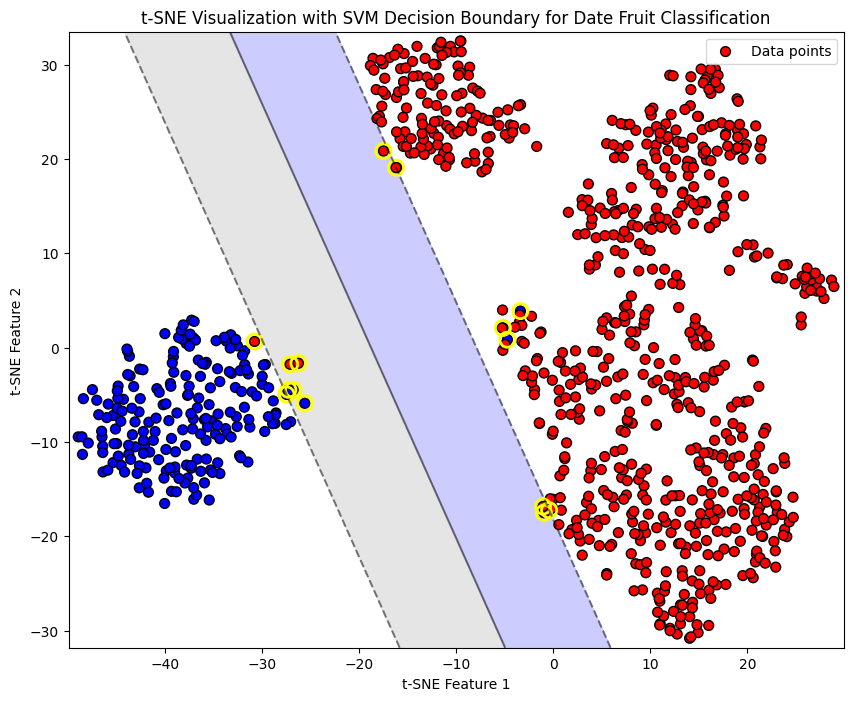

In [11]:
X_tsne = X_TSNE
support_vectors = model.support_vectors_
svm = model 

from matplotlib.colors import ListedColormap

# Create grid to plot decision boundaries
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Plot decision boundary and margins
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])  # TODO: Use the decision function to predict decision boundaries
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))  # Define plot size here to ensure it encompasses all the elements
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'grey', 'red'])  # Background color for decision areas
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])  # Decision boundaries and margins

# Plot data points and support vectors
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), s=50, edgecolors='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=120, facecolors='none', edgecolors='yellow', linewidths=2, label='Support vectors')

# Labels and title
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Visualization with SVM Decision Boundary for Date Fruit Classification')
plt.legend(handles=[scatter], labels=['Data points'], loc='upper right')

plt.show()

## D104Q8

In [12]:
# Sample Data (Binary classification)
X = np.array([[2, 3], [3, 4], [1, 1], [4, 5], [6, 7]])
y = np.array([1, 1, -1, 1, -1])

data = pd.DataFrame(X, columns = ['f1', 'f2'])
data['y'] = y

data.head()

,f1,f2,y
0,2,3,1
1,3,4,1
2,1,1,-1
3,4,5,1
4,6,7,-1


In [16]:
import numpy as np

# Hinge Loss Implementation
def hinge_loss(X, y, weights, bias):
    """
    Compute hinge loss for a simple SVM model.
    Args:
        X (ndarray): Feature matrix.
        y (ndarray): Target vector.
        weights (ndarray): Weight vector.
        bias (float): Bias term.
    Returns:
        float: Hinge loss value.
    """
    margins = y * (np.dot(X, weights) + bias)  # TODO: Calculate the margins using a dot product of weights and features, and add the bias
    hinge_loss = np.maximum(0, 1 - margins)  # TODO: Apply the hinge loss formula: max(0, 1 - margin)
    return np.mean(hinge_loss)  # TODO: Return the mean or sum of the hinge loss values

# Example weights and bias
weights = np.array([0.5, 0.5])
bias = 0.0

# Compute Hinge Loss
loss = hinge_loss(X, y, weights, bias)
print(f'Hinge Loss: {loss:.4f}')

Hinge Loss: 1.9000
